In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tweepy
import time
import random as rd
import json
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [5]:
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret

In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [9]:
target_term = "@CNNbrk"

In [59]:
tweetID_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

In [60]:
public_tweets = api.search(target_term, count=100, result_type="recent")

In [61]:
columns = ["compound","positive","negative","neutral"]
news_df = pd.DataFrame(columns=columns)
counter = 1

for tweet in public_tweets["statuses"]:
    tid = counter
    com = analyzer.polarity_scores(tweet["text"])["compound"]
    pos = analyzer.polarity_scores(tweet["text"])["pos"]
    neu = analyzer.polarity_scores(tweet["text"])["neu"]
    neg = analyzer.polarity_scores(tweet["text"])["neg"]

    tweetID_list.append(tid)
    compound_list.append(com)
    positive_list.append(pos)
    negative_list.append(neg)
    neutral_list.append(neu)
    
    counter += 1
    
    sentiment = {"Tweet_counter": tweetID_list,
                "Compound": compound_list,
                "Positive":positive_list,
                "Neutral": negative_list,
                "Negative": neutral_list}
    
    news_df = pd.DataFrame.from_dict(sentiment)

In [62]:
news_df.head()

,Compound,Negative,Neutral,Positive,Tweet_counter
0,0.0000,1.000,0.000,0.000,1
1,0.0000,1.000,0.000,0.000,2
2,-0.7398,0.691,0.256,0.054,3
3,0.0000,1.000,0.000,0.000,4
4,0.0000,1.000,0.000,0.000,5


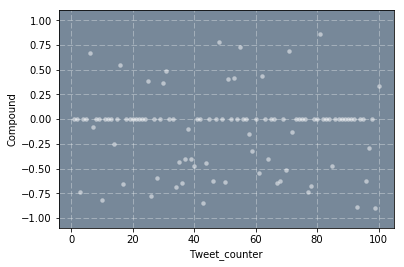

In [102]:

news_plot = news_df.plot(kind='scatter', x='Tweet_counter', y='Compound', color="white", alpha=0.5, linewidth=0)
news_plot.set_ylim((-1.10, 1.10))
news_plot.set_facecolor("lightslategray")
news_plot.grid(color="white", linestyle="dashed", alpha=0.4)
plt.show()
